In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/green_tech_data.csv')

sustainability
0    85
1    15
Name: count, dtype: int64


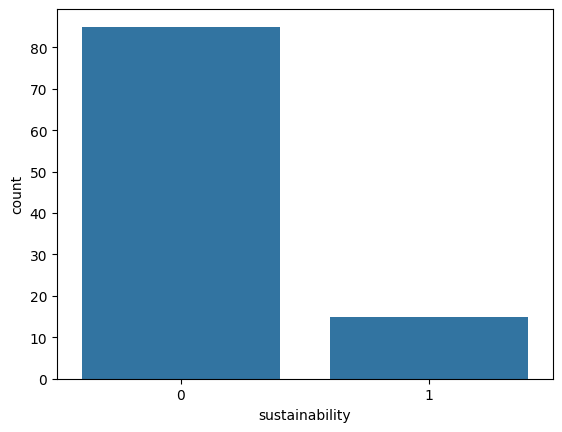

In [ ]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

In [ ]:
#define X and Y for column: carbon_emissions	energy_output	renewability_index	cost_efficiency	sustainability

X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
Y = data['sustainability']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()


,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


In [ ]:
#confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [ ]:
#classification report
cr = classification_report(ytest, ypred)
print("Classification Report:")
cr

Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        17\n           1       1.00      0.67      0.80         3\n\n    accuracy                           0.95        20\n   macro avg       0.97      0.83      0.89        20\nweighted avg       0.95      0.95      0.95        20\n'

Text(0.5, 23.52222222222222, 'Predicted')

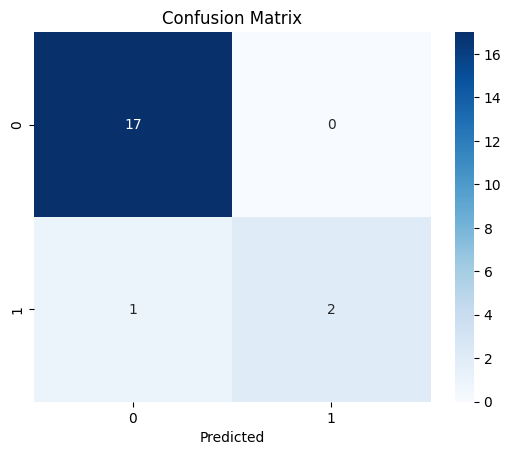

In [ ]:
conf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')

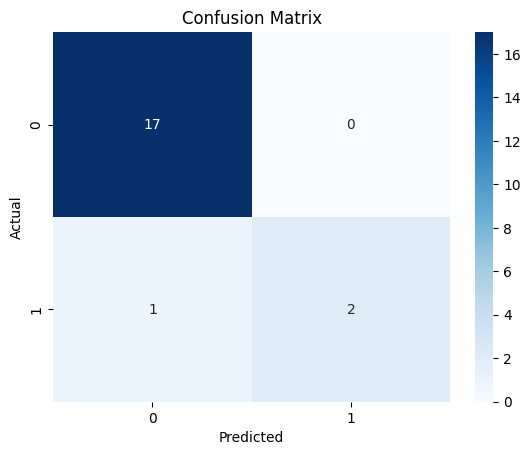

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [ ]:
#confusion matrix
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

In [ ]:
#  feature importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)


                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [ ]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [ ]:
new_data = np.array([[22.49,45.33,52.33]])
predictions = model.predict(new_data)
print(predictions)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
